In [0]:
import time
start = time.time()

In [2]:
!pip install tensorflow==1.14.0

In [0]:
import pandas as pd
import numpy as np
import cv2
import os,sys
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split

LABELS = ["Plane", "Car"]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = "/content/drive/My Drive/carplane/dataset"
print(os.listdir(path))

['train', 'test', 'new_image']


In [6]:
print(os.listdir("/content/drive/My Drive/carplane/dataset/test"))

['planes', 'cars']


In [7]:
print(os.listdir("/content/drive/My Drive/carplane/dataset/test"))

['planes', 'cars']


In [0]:
Train_DIR = "/content/drive/My Drive/carplane/dataset/train/"
Test_DIR = "/content/drive/My Drive/carplane/dataset/test/"

In [0]:
#Preprocessing
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['cars']:
                label = 0
            elif nextdir in ['planes']:
                label = 1
            else:
                label = 2
    return nextdir, label


In [0]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

In [0]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['cars']:
                label = 0
            elif nextDir in ['planes']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [12]:
X_train, y_train = get_data(Train_DIR)

100%|██████████| 200/200 [00:02<00:00, 96.06it/s]


In [13]:
X_test , y_test = get_data(Test_DIR)

100%|██████████| 50/50 [00:00<00:00, 101.88it/s]


In [14]:

print('Total training dataset',X_train.shape )
print('Total test data', X_test.shape)

Total training dataset (400, 150, 150, 3)
Total test data (100, 150, 150, 3)


In [15]:
print('Total  set of labels to all the data in x_train',y_train.shape )
print('Total set of labels to all the data in x_test', y_test.shape)

Total  set of labels to all the data in x_train (400,)
Total set of labels to all the data in x_test (100,)


In [16]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
Pimages = os.listdir(Train_DIR + "planes")
Nimages = os.listdir(Train_DIR + "cars")

(Left) - Car Vs (Right) - Plane
-----------------------------------------------------------------------------------------------------------------------------------


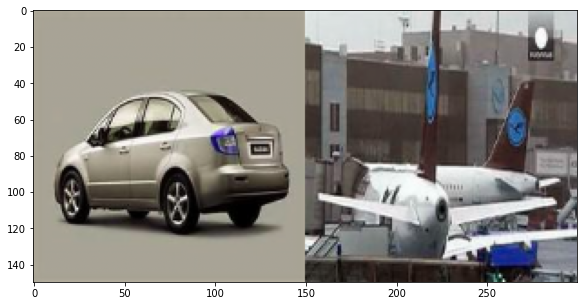

(Left) - Car Vs (Right) - Plane
-----------------------------------------------------------------------------------------------------------------------------------


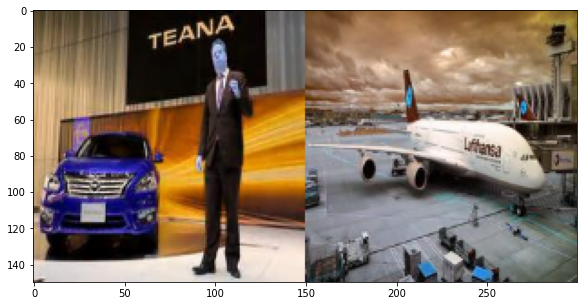

(Left) - Car Vs (Right) - Plane
-----------------------------------------------------------------------------------------------------------------------------------


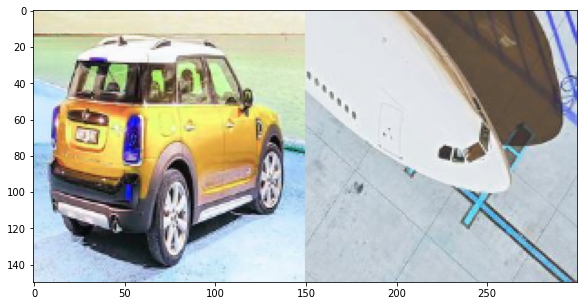

(Left) - Car Vs (Right) - Plane
-----------------------------------------------------------------------------------------------------------------------------------


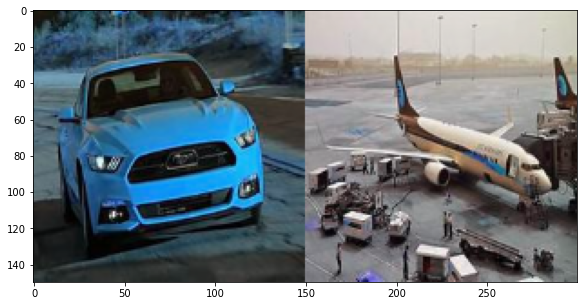

(Left) - Car Vs (Right) - Plane
-----------------------------------------------------------------------------------------------------------------------------------


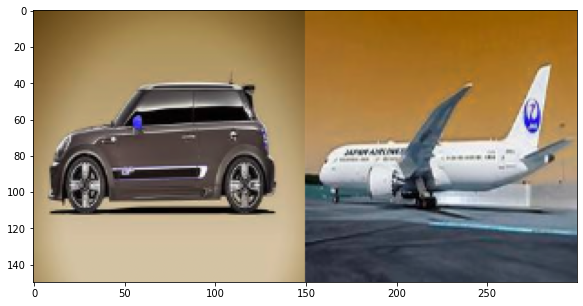

In [18]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(Train_DIR+"planes/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(Train_DIR+"cars/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - Car Vs (Right) - Plane")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [0]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

#function
def train_test_rmse(x,y):
    x = Iris_data[x]
    y = Iris_data[y]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(accuracy_score(y_test, y_pred))  # or you can save it in variable and return it 
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

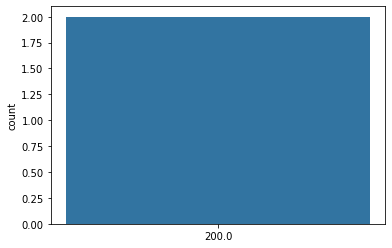

In [20]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)


In [21]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
from keras import *
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam, SGD , RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [23]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 16)      2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)       

In [0]:
model.compile(loss='binary_crossentropy', optimizer=Adam(),metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train, epochs=10,batch_size = 256,
                    validation_data=(X_test,y_test))

Train on 400 samples, validate on 100 samples
Epoch 1/10
400/400 [==============================] - 92s 231ms/step - loss: 0.7142 - acc: 0.4887 - val_loss: 0.8058 - val_acc: 0.5450
Epoch 2/10
400/400 [==============================] - 91s 227ms/step - loss: 0.8330 - acc: 0.5275 - val_loss: 0.5853 - val_acc: 0.6950
Epoch 3/10
400/400 [==============================] - 90s 226ms/step - loss: 0.6050 - acc: 0.6750 - val_loss: 0.5028 - val_acc: 0.7600
Epoch 4/10
400/400 [==============================] - 90s 226ms/step - loss: 0.5435 - acc: 0.7287 - val_loss: 0.4191 - val_acc: 0.8600
Epoch 5/10
400/400 [==============================] - 88s 220ms/step - loss: 0.4779 - acc: 0.7925 - val_loss: 0.3088 - val_acc: 0.8750
Epoch 6/10
400/400 [==============================] - 87s 218ms/step - loss: 0.4253 - acc: 0.8125 - val_loss: 0.3083 - val_acc: 0.8600
Epoch 7/10
400/400 [==============================] - 86s 215ms/step - loss: 0.3929 - acc: 0.8200 - val_loss: 0.3246 - val_acc: 0.8700
Epoch 8/1

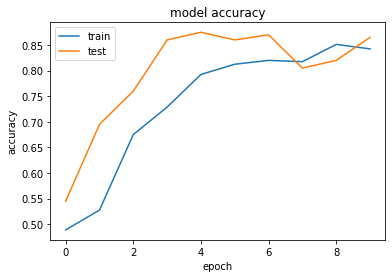

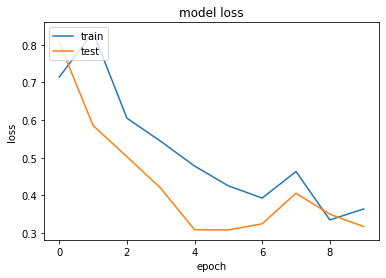

In [27]:
import matplotlib.pyplot as plt
from keras.models import load_model


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('mymodel.h5')

In [0]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
y_predicted  = np.argmax(pred,axis = 1) 
y_right  = np.argmax(y_test,axis = 1)

In [30]:
cnf = confusion_matrix(y_right, y_predicted )
np.set_printoptions(precision=2)
cnf

array([[44,  6],
       [ 7, 43]])

In [31]:
from sklearn.metrics import accuracy_score
print ('Accuracy Score :',accuracy_score(y_right, y_predicted)) 

Accuracy Score : 0.87


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_right, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        50
           1       0.88      0.86      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [0]:
from sklearn.metrics import precision_recall_curve

precision , recall , thresolds = precision_recall_curve(y_right, y_predicted)

In [34]:
precision  

array([0.5 , 0.88, 1.  ])

In [35]:
recall

array([1.  , 0.86, 0.  ])

In [36]:
thresolds

array([0, 1])

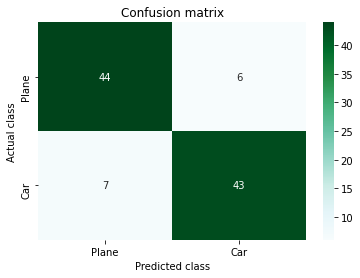

In [37]:
sns.heatmap(cnf, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap=plt.cm.BuGn);
plt.title("Confusion matrix")
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

In [38]:
end = time.time()
print("total runtime: ",(end - start))

total runtime:  913.997189283371


This is a Plane


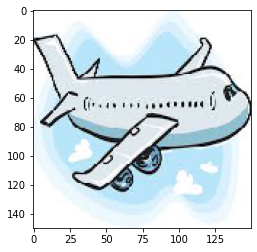

In [52]:
img = image.load_img('/content/drive/My Drive/carplane/dataset/new_image/planes/aeroplane.jpg', target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
if classes == [1]:
   print("This is a Plane")
elif classes == [0]:
  print("This is a Car")
else:
   print("Sorry")


This is a Car


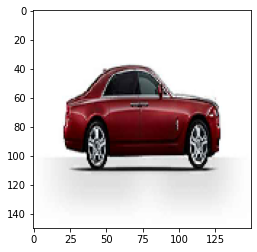

In [53]:
img = image.load_img('/content/drive/My Drive/carplane/dataset/new_image/cars/new_car.jpg', target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
if classes == [1]:
   print("This is a plane")
elif classes == [0]:
  print("This is a Car")
else:
   print("Sorry")